<div style="
    border: 2px solid #4CAF50; 
    padding: 15px; 
    background-color: #f4f4f4; 
    border-radius: 10px; 
    align-items: center;">

<h1 style="margin: 0; color: #4CAF50;">ML Basics 2: Lernen von Daten</h1>
<h2 style="margin: 5px 0; color: #555;">DSAI</h2>
<h3 style="margin: 5px 0; color: #555;">Jakob Eggl</h3>

<div style="flex-shrink: 0;">
    <img src="https://www.htl-grieskirchen.at/wp/wp-content/uploads/2022/11/logo_bildschirm-1024x503.png" alt="Logo" style="width: 250px; height: auto;"/>
</div>
<p1> © 2024/25 Jakob Eggl. Nutzung oder Verbreitung nur mit ausdrücklicher Genehmigung des Autors.</p1>
</div>
<div style="flex: 1;">
</div>   

# Beurteilung des Gelernten Models

Im letzten Notebook haben wir gelernt, wie das Training von Modellen in etwa funktioniert und abschließend auch intuitive Beurteilungen von der Qualität des Models gemacht.

Insbesondere haben wir diese Theorie immer anhand vom linearen Regressionsmodell erörtert. Obwohl für die verschiedenen Modelltypen dies unterschiedlich aussehen kann, stellt uns dieses Modell die Theorie sehr deutlich dar. 

![Underfitting_Regression](../resources/2_Underfitting_Wiederholung_Regression.png) vs. ![Overfitting_Regression](../resources/2_Overfitting_Wiederholung_Regression.png)

(von https://visualize-it.github.io/polynomial_regression/simulation.html)

Nun wollen wir das ganze formalisieren und im Detail besprechen.

Dabei werden wir folgende Dinge besprechen (und mit Code durchführen):
* **Overfitting und Underfitting**
* **Train-Test Splits**
* **Metriken zur Evaluierung (inkl. Confusion Matrix)**
* **Tipps und Tricks**

---

# Overfitting und Underfitting

Die beiden obigen Bilder repräsentieren 2 wichtige Zustände, welche im Rahmen des Trainings eines Modells erreicht werden können: **Overfitting** und **Underfitting**.

Beides sind **Zustände**, die wir **nicht erreichen wollen**!

## Overfitting

* Modell "**lernt** die Trainingsdaten **auswendig**"
* Jeder Punkt wird genau getroffen
* Für **neue Punkte** ist die Vorhersage **schlecht**
* Beispiel: Stell dir vor, du lernst für eine Matheprüfung, indem du alle Aufgaben auswendig lernst, die im Buch stehen. Wenn in der Prüfung andere Aufgaben kommen, weißt du nicht, wie du sie lösen sollst.

## Underfitting

* Modell ist **zu einfach** um Muster aus den Daten zu erkennen
* Fast kein Punkt wird genau getroffen
* Kann **weder Trainingsdaten**, **noch** neue **Daten** gut **vorhersagen**
* Beispiel: Stell dir vor, du lernst für eine Matheprüfung, indem du nur die Überschriften aus dem Mathe-Buch liest. Nun hast du zu wenig Wissen, die Aufgaben zu lösen.

## Der gute Mittelweg (Right Fit)

Wir wollen ein Modell, welches:
* die **Muster gut erkennt**
* **kein** **"auswendig lernen"** der (Trainings)Daten
* **Gute Vorhersagen** für **neue Daten** treffen kann

![Right Fit vs Overfitting and Underfitting](../resources/2_Overfitting_vs_Underfitting_Regression_Classification.png)

(von https://de.mathworks.com/discovery/overfitting.html)

![Polynomial Grad 3 Right Fit](../resources/2_Good_Tradeoff_Polynomial_Degree3.png)

(von https://visualize-it.github.io/polynomial_regression/simulation.html)

Wie können wir nun so ein Modell erhalten, bzw. wie können wir entscheiden, ob ein Modell zu einfach oder zu kompliziert ist?

Um dies zu beantworten, sehen wir uns nun eine Technik an, bei der wir die Daten in sogenannte **Trainingsdaten** und **Testdaten** unterteilen.

# Train Test Split

![Train_Test_Split](../resources/2_Train_Test_Split.jpg)

(von https://builtin.com/data-science/train-test-split)

**Wichtig:** Auch bei den Testdaten besitzen wir das echte Label, hier mit $y$ gekennzeichnet.

1. Was ist der Train-Test-Split?
    * Methode um Datenset in **2 Teile** aufzuteilen
        * **Trainingsdaten**: Werden vom Modell benutzt, um die Muster zu lernen.
        * **Testdaten**: Werden verwendet, um zu überprüfen, ob das Modell auch bei neuen Daten gut funktioniert
1. Warum brauchen wir das?
    * Wir wollen sichergehen, dass das Modell nicht nur auswendig lernt (Overfitting) sondern auch gut verallgemeinern kann
1. Wie teilt man die Daten auf?
    * Frei wählbar, üblich sind aber etwa **80% Trainingsdaten** und **20% Testdaten**
1. Beispiel:
    * Stell dir vor, du lernst für eine Mathematikprüfung:
        * Die Trainingsdaten sind einige Übungsbeispiele, bei denen auch die Lösung gegeben ist.
        * Du versuchst nun mit Hilfe von den Lösungen die Aufgaben zu verstehen und zu lernen, wie man solche Beispiele löst
        * Bei der Prüfung selber hast du aber keinen Zugang zu den Lösungen, weswegen du dir sicher sein willst, dass du die Beispiele tatsächlich verstanden hast und nicht nur die Übungsaufgaben auswendig gelernt hast
        * Dafür verwendest du jetzt weitere Beispiele, von denen du die Lösung weißt (=Testdaten). Diese musst du nun lösen, ohne auf die Lösung zu schauen. Dafür kannst du im Nachhinein mit der Musterlösung vergleichen.
1. Was gibt es sonst noch zu beachten?
    * Die Testdaten dürfen nie im Trainingsdataset vorkommen! (Ansonsten könnte das Modell einfach auch die Testdaten auswendig lernen)
    * Die Testdaten sollen das ganze Dataset gut repräsentieren, genauso die Trainingsdaten (**i.i.d.-Annahme** - siehe nächster Absatz)
    * Es ist vernünftig (nicht nur hier, sondern allgemein), einen **seed** zu vergeben, somit bleiben die Ergebnisse reproduzierbar.

# Die i.i.d. Annahme

Eine Voraussetzung, um ein gutes Modell zu bekommen ist es, dass die Daten, die wir verwenden die **i.i.d.**-Annahme (**independent and identically distribueted** - also unabhängig und identisch verteilt) erfüllen. 

1. Was bedeuten unabhängige (**independent**) Daten?
    * Jeder Datenpnkt ist von den anderen Datenpunkten unabhängig.
    * Das Ergebnis des einen Datenpunktes hängt nicht (mit dem Ergebnis) des nächsten Datenpunkts zusammen!
    * Beispiel: Wenn du für die Matheprüfung lernst, dann soll jedes Beispiel eigenständig sein. Man will also nicht, dass du ein Beispiel nicht lernen kannst, weil du bereits ein anderes nicht gelernt hast und umgekehrt.
1. Was bedeuten identisch verteilte (**identically distributed**) Daten?
    * Alle Datenpunkte sind gleich wahrscheinlich
    * Es soll damit garantiert werden, dass von jedem möglichen Bereich Daten vorhanden sind
    * Beispiel: Wenn du für die Matheprüfung lernst, dann wäre es schlecht, wenn in den Übungsbeispielen ein Kapitel nicht vorhanden ist. Dieses würdest du dann nicht lernen können und wärst dann schlecht für den Test vorbereitet.

* Sollten die Daten (und von dem gehen wir normalerweise aus) die **i.i.d.** Annahme erfüllen, so darf zum Beispiel das Mischen der Datenpunkte (Reihenfolge in dem Dataset) keinen Unterschied machen!
* **Achtung:** Bei Sequentiellen Daten (zum Beispiel Audio, Text oder Zeitreihen im Allgemeinen) muss man aufpassen, hier darf man die Daten natürlich nicht einfach auf dieser Ebene mischen? Erfüllen Sie trotzdem die **i.i.d.** Voraussetzung?

* **Wichtig** ist auch: In beiden Datasets (Train und Test) sollen in etwa die gleichen "Arten von Daten" vorkommen:
    * Im vorigen Beispiel (Lernen für die Mathematik Prüfung) heißt das konkret: Es sollen in beiden Aufgabensets (Training und Test) alle Arten von Problemen auftauchen. Es macht wenig Sinn, wenn zum Beispiel in den Übungsaufgaben nur Aufgaben zum Thema Differenzieren und im Testbeispiel nur Beispiele zum Thema Integrieren vorkommen!

## Train/Test Split in Python

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine
import seaborn as sns

Zuerst Laden wir das Dataset. Bisher haben wir nur eine Variable bekommen, diesmal wollen wir direkt x und y!

In [4]:
X, y = load_iris(return_X_y=True, as_frame=False) # Wir verwenden as_frame = False (=Default), damit wir nur die Daten bekommen (als Array)

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
X.shape

(150, 4)

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
y.shape

(150,)

In [9]:
# Wir splitten die Daten in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # mischt das Dataset automatisch. Ansonsten hätten wir viel weniger mit Label 2

In [10]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [11]:
X_train.shape

(120, 4)

In [12]:
X_test.shape

(30, 4)

In [13]:
y_train.shape

(120,)

Nun stellt sich nach wie vor die Frage, wie wir nun bewerten können, ob unser Modell gut performt.

Dies ist, wie bereits besprochen, für eine Regression ziemlich einfach. Für kompliziertere Modelle (und für eine objektive Beurteilung von einfachen Modellen) führen wir jetzt ein paar Metriken ein, welche diese Performance messen.

# Metriken zur Evaluierung

Nun besprechen wir verschiedene **Metriken**, welche verwendet werden können um die **Perfomance** von **Regressions- und Klassifikationsmodellen** zu **bewerten**.

## Regressionsmetriken

Die üblichste Möglichkeit, ein Regressionsmodell zu beurteilen ist es, den **Mean Squared Error** (*MSE*) zu berechnen.

![Evaluation_Regression](../resources/2_Regression_Evaluation.png)

Dazu nehmen wir das trainierte Modell (nur auf den Trainingsdaten trainiert) und berechnen für jeden Punkt in den Testdaten die quadratische Abweichung zum Wert, der vorhergesagt wurde. Abschließend berechnen wir noch den Mittelwert dieser Abweichung.

Die Formel ist also

\begin{equation*}
    \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_{\text{true}}-y_{\text{predicted}})^2
\end{equation*}

Idealerweise ist dieser Fehler natürlich klein!

**Wichtig:** Es darf kein Testpunkt in den Trainingsdaten sein und umgekehrt. Ansonsten ist der berechnete Wert ohne Aussagekraft!

## Metriken für die Klassifizierung

Im Fall von 2 Klassen erstellt unser Modell also für jeden Datenpunkt einen Output (Vorhersage) von entweder $0$ oder $1$. In unserem Testset haben wir das echte (true) Label, somit können wir einfach zählen, wie oft die Prediciton von unserem Modell mit jener vom echten Dataset zusammen stimmt. Dies ist eine Möglichkeit zur Evaluierung und nennt sich **Accuracy**.

\begin{equation*}
\text{Accuracy} = \frac{\text{Anzahl der korrekten Vorhersagen}}{\text{Anzahl der Datenpunkte im Testset}}.
\end{equation*} 

Ein perfekter Klassifizierer hat also eine Accuracy von $1$, also $100\%$ richtige Vorhersagen.

Es gibt auch noch die **Balanced Accuracy**, welche die Klassenverteilung miteinbezieht, diese wird aber jetzt nicht mathematisch Beschrieben. Anwendbar ist sie in Python sowieso ziemlich einfach via `scikit-learn`!

Es gibt aber noch weitere Metriken, welche für Klassifizierung verwendet werden können.

Ein Grund für die große Auswahl ist, weil man je nach **Anwendungsfall** auf **andere Eigenschaften** des Modells Wert legt!

Dafür betrachten wir nun zuerst die sogenannte **Confusion Matrix**!

## Confusion Matrix

Eine **Confusion Matrix** zeigt die Performance eines Klassifikationsmodells, indem sie echte und vorhergesagte Klassen vergleicht.  
Beispiel für eine 2-Klassen-Klassifikation:  

|                  | **Positive Vorhersage** | **Negative Vorhersage** |
|------------------|--------------------------|--------------------------|
| **Positive Fälle** | **True Positive (TP)**  | **False Negative (FN)**  |
| **Negative Fälle** | **False Positive (FP)** | **True Negative (TN)**   |

- **True Positive (TP):** Modell sagt "positiv" und es ist korrekt.  
- **False Positive (FP):** Modell sagt "positiv", aber es ist falsch.  
- **True Negative (TN):** Modell sagt "negativ" und es ist korrekt.  
- **False Negative (FN):** Modell sagt "negativ", aber es ist falsch.

In diesem Fall bedeuten positiv und negativ zum Beispiel Klasse $1$ und Klasse $0$.

Mit diesen können wir nun **weitere Metriken** zur Bewertung von Klassifikationsmodellen definieren!

\begin{equation*}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}.
\end{equation*} 

Die **Precision** gewichtet Falsch-Positive (FP) Fälle auch mit ein. Dieser Wert soll hoch sein, wenn wir Falsch-Positive Vorhersagen problematisch sind (zum Beispiel bei Krankheitstest (Corona)).

\begin{equation*}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}.
\end{equation*} 

Der **Recall** wird auch **True Positive Rate** (*TPR*) genannt. Dementsprechend gibt es auch eine **True Negative Rate** (*TNR*). 

\begin{equation*}
\text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}.
\end{equation*} 

Eine weitere Metrik ist der sogenannte $F1$-Score:
\begin{equation*}
\text{F1-Score} = 2\cdot \frac{\text{Precision}\cdot \text{Recall}}{\text{Precision} + \text{Recall}}.
\end{equation*} 

**Wichtig:** Die vorigen Metriken funktionieren nur für die binäre Klassifikation (sprich $0$ oder $1$ Klassifizierung). Für Multiclass Klassifizierung verwendet man deswegen hauptsächlich die Accuracy oder ändert die genannten Metriken leicht ab!

Dies gilt natürlich auch für die Confusion Matrix im Allgemeinen!

## Confusion Matrix für Multiclass Klassifikation

![Multiclass Confusion Matrix](../resources/2_Confusion_Matrix_Multiclass.png)

(from AI Vis 2024WS Prof. Marc Streit)

Nun muss bei einer Falschklassifikation unterschieden werden, welche Klasse anstelle der richtigen Klasse vorhergesagt wurde!

## Evaluierung in Python

Insgesamt bietet auch hier `scikit-learn` viele praktische Funktionen, sodass sehr wenig ausprogrammiert werden muss.

In [14]:
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Wir werden nun unser erstes Modell trainieren!🥳

Wir betrachten jetzt nur Klassifikation. Außerdem geht es noch nicht um das Modell selber, sondern um die Evaluierung im Anschluss.

Das Trainieren der Modelle passiert nächste Woche!

In [15]:
from sklearn.neighbors import KNeighborsClassifier # Laden der Modellklasse

In [16]:
# Wir verenden das wine dataset
X, y = load_wine(return_X_y=True, as_frame=False)

In [17]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [18]:
X.shape

(178, 13)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [20]:
y.shape

(178,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
number_of_neighbors = 7

knn = KNeighborsClassifier(n_neighbors=number_of_neighbors) # Instanziieren des Modells
trained_model = knn.fit(X_train, y_train) # Trainieren des Modells

In [23]:
# Model Evaluierung

y_pred = trained_model.predict(X_test) # Vorhersage auf den Testdaten

In [24]:
y_pred

array([0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

In [25]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [26]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
print(f"Die Accuracy beträgt: {accuracy}")

Die Accuracy beträgt: 0.6944444444444444


In [28]:
print(f"Die Confusion Matrix lautet:\n{conf_matrix}")

Die Confusion Matrix lautet:
[[13  0  1]
 [ 0  9  5]
 [ 2  3  3]]


Wir können nun auch die Confusion Matrix mit einer Heatmap visualisieren!

<Axes: >

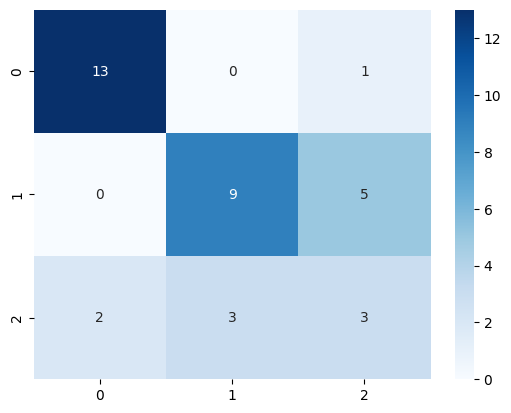

In [29]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

Vielleicht schafft ein anderes Modell (oder andere Hyperparameter) eine bessere Performance?

Wie sieht es mit den Iris Daten aus?

# Tipps and Tricks

Falls ein Modell schlecht performt, kann man sich folgende Dinge überlegen:
* Daten normalisieren (Beispiel k-nearest-neighbor)
* Mehr Daten beschaffen (eventuell Data Augmentation möglich)
* **Model kleiner** machen, indem manche Features nicht verwendet werden (hilft auch oft gegen Overfitting), zum Beispiel mittels Korrelationsmatrix, um zu sehen, welche Features mehr oder weniger das gleiche Verhalten haben.

Letzteren Punkt sehen wir uns jetzt nochmal mit Python an!

<Axes: >

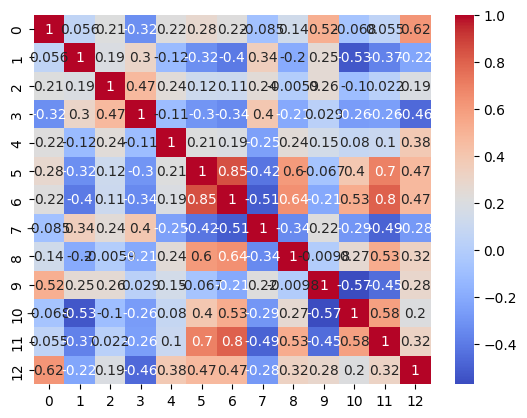

In [30]:
# Correlation Matrix

correlation_matrix = np.corrcoef(X_train, rowvar=False) # Berechnen den Korrelationskoeffizienten (wie in den Visualisierungsunterlagen besprochen)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Hohe Werte können nun entfernt werden und das Model wird kleiner, somit auch schneller mit vergleichsweise wenig (oder keinem) Verlust in der Performance. Oft verbessert das die Perfomance am Testset sogar (Overfitting).

## Aufgabe

* Verwende das Dataset, welches für die bisherigen Gruppenarbeiten bereits verwendet wurde und schaue dir die Größe an
* Versuche das Dataset mit Hilfe von `sklearn` in einen Train- und in einen Testteil zu unterteilen.
* Funktioniert es auch mit Dataframes?
* Wie kann ich aus einem bestehenden Dataframe das Label extrahieren?